In [1]:
%load_ext watermark
%watermark

2018-12-23T22:28:17-06:00

CPython 3.6.7
IPython 7.2.0

compiler   : GCC 8.2.0
system     : Linux
release    : 4.15.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La magia de %matplotlib notebook, es muy util para hacer plots mas visibles, pero es un poco complicada de usar ya que se requieren 
el cerrar cada plot para poder continuar.
Alternativamente, se pueden usar la magia de %matplotlib inline, que es mas sencilla, ya que simplemente muestra el grafico original en notebook. 
Para poder modificar el tamaño de los plots en este caso basta con cambiar el parametro general de matplolib figure.figsize
al tamaño de grafico deseado (en pulgadas).

In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"]=(20,20)#20 pulgadas de ancho y 20 de alto para todos los plots

## Lectura de datos.

In [5]:
vehiculos=pd.read_pickle("/home/jose/data/vehiculos_3_variables_agrupadas.pkl")

In [7]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo        category
trasmicion_tipo           object
combustible_tipo        category
tamaño_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

## Distribución de la variables numéricas

Usamos histogramoas para ver la distribucion de la varable numerica

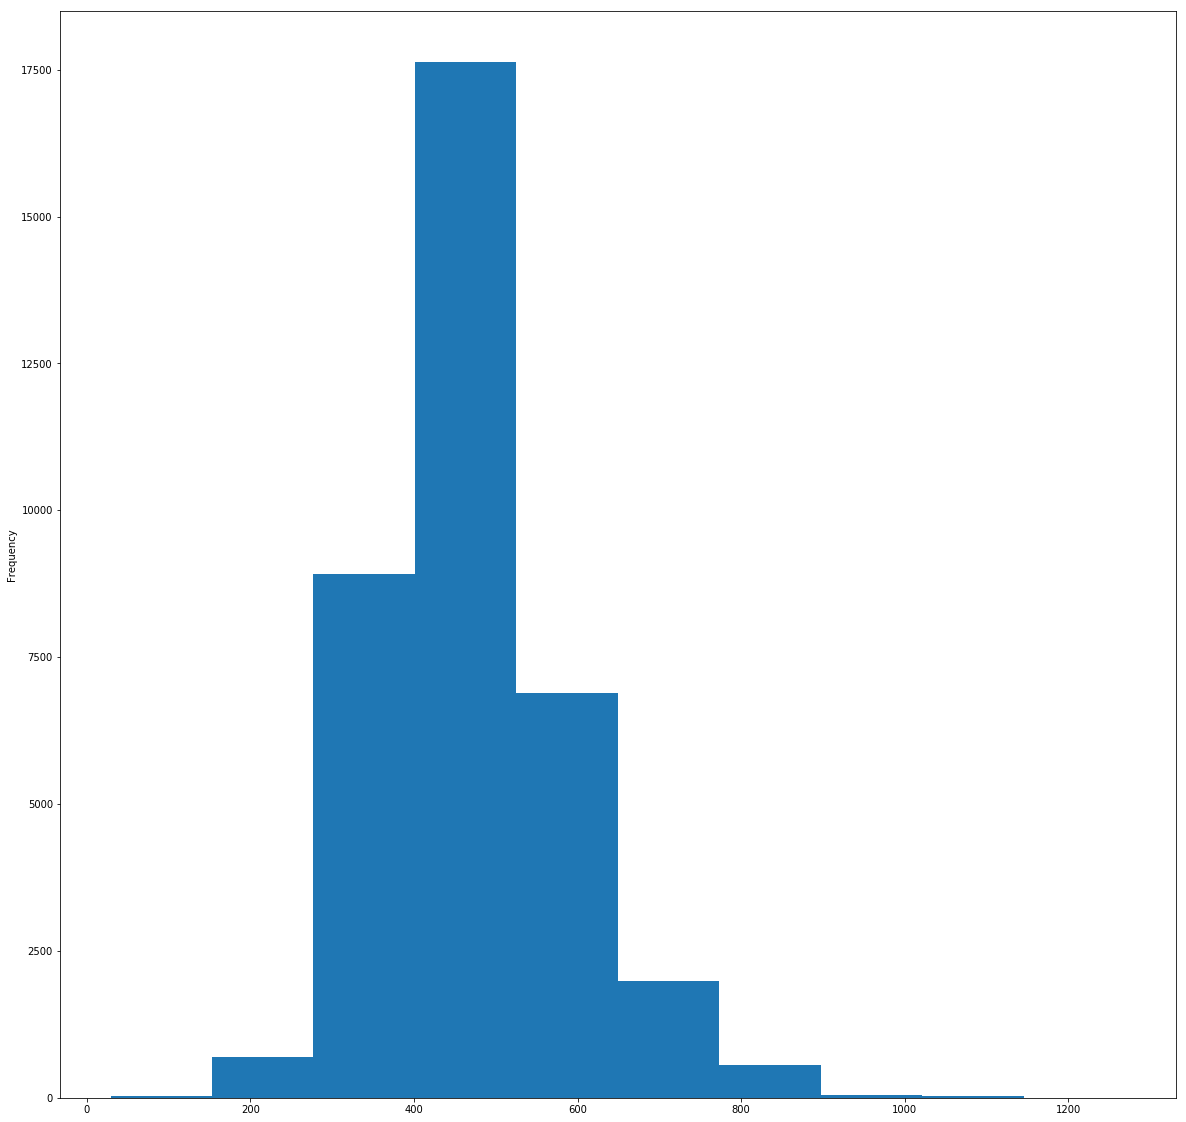

In [8]:
vehiculos["co2"].plot.hist();

Alternativamente, podemos hacer un grafico KDE, o Kernel Density Estimate, que produce una funcion estimada de la distribucion de la variable(funcion de la desidad de probabilidad)

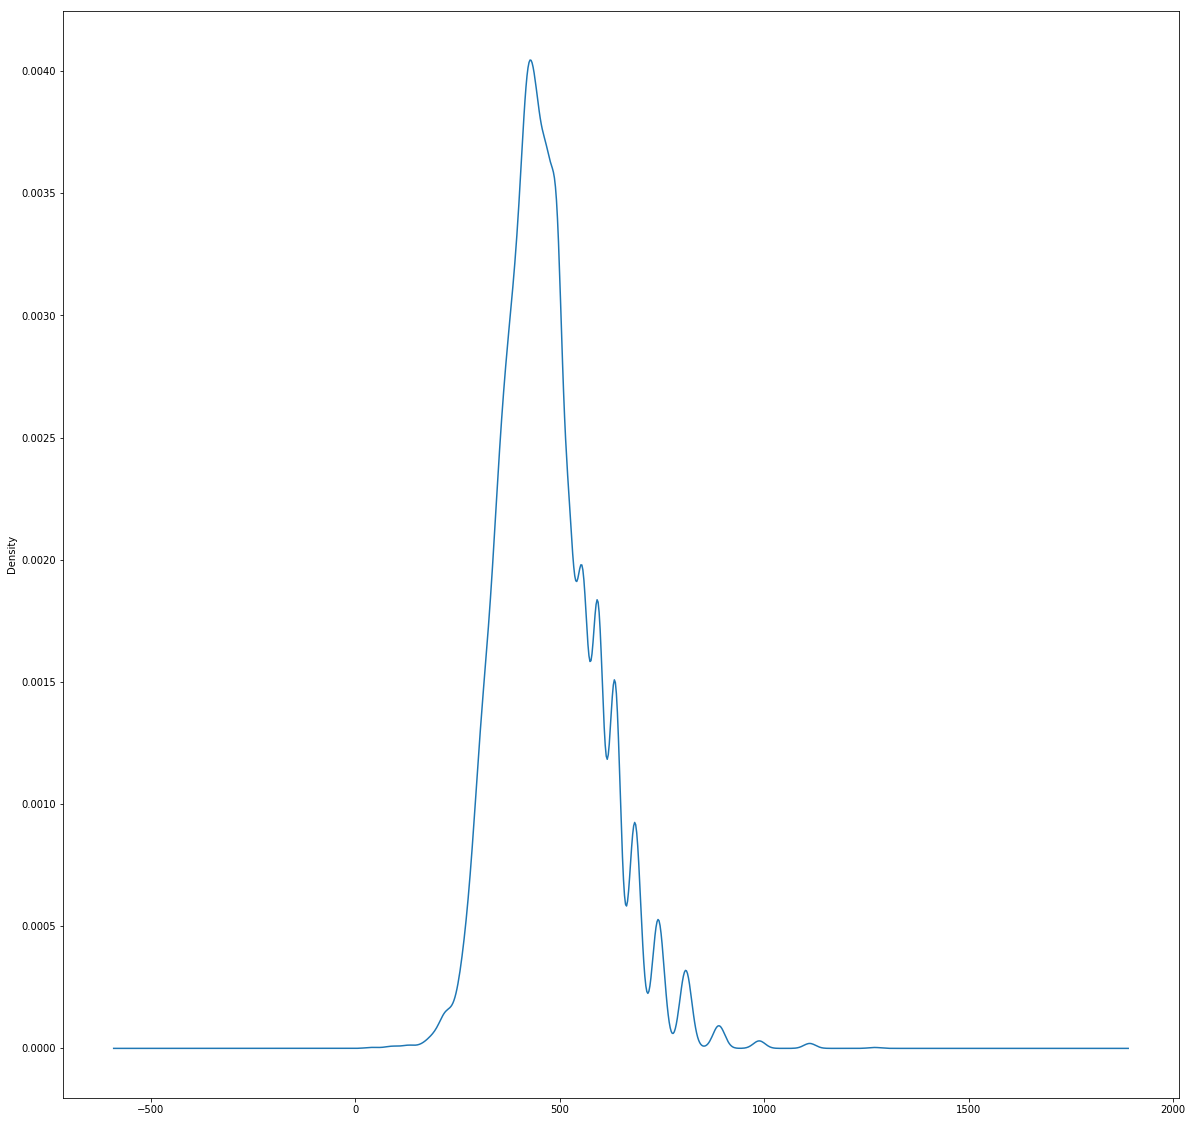

In [10]:
vehiculos["co2"].plot.kde()

In [11]:
def distribucion_variable_numerica(df,col):
    df[col].plot.kde()
    plt.xlabel("Distribucion de la variable {}".format(col))
    plt.show()

Ahora podemos usar un pywidgets para poder analizar la distribucion mas comodamente. Tiene sentido hacer estos graficos solo para variables numericas. 
El metodo de pandas.select_dtypes devuelven aquellas columas de unos tipos especificos

In [12]:
columnas_numericas=vehiculos.select_dtypes(["int64","float64"]).columns

In [13]:
columnas_numericas

Index(['year', 'desplazamiento', 'cilindros', 'consumo', 'co2',
       'consumo_litros_milla'],
      dtype='object')

In [14]:
from ipywidgets import interact,fixed

In [15]:
interact(distribucion_variable_numerica,col=columnas_numericas,df=fixed(vehiculos))

interactive(children=(Dropdown(description='col', options=('year', 'desplazamiento', 'cilindros', 'consumo', '…

<function __main__.distribucion_variable_numerica(df, col)>

In [16]:
vehiculos["cilindros"].value_counts(normalize=True)

4.0     0.381184
6.0     0.350767
8.0     0.220344
5.0     0.020115
12.0    0.015630
3.0     0.006252
10.0    0.004132
2.0     0.001359
16.0    0.000217
Name: cilindros, dtype: float64

Parece que gran parte de las variables siguen una distribucion normal es importante dado que muchos algoritmos asumen que la distribucion de las variables es normal.

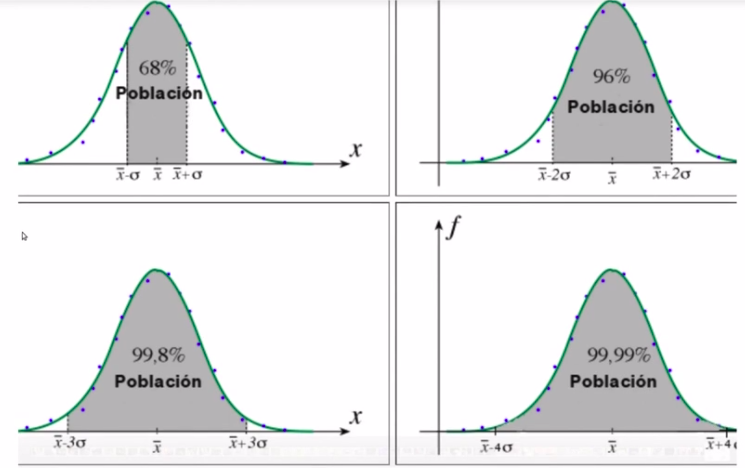

La funcion scipy.stats probplot compara la distribucion de una variable con una distribucion teorica(la normal por defecto), en cuanto mas se parezca la grafica a una linea de 45 grados mas normal será.

In [19]:
from scipy import stats

In [20]:
def normalida_variable_numerica(col):
    stats.probplot(vehiculos[col],plot=plt)
    plt.xlabel("Diagranas de Probabilidad(normal) de la variable{}".format(col))
    plt.show()

In [21]:
interact(normalida_variable_numerica,col=columnas_numericas);

interactive(children=(Dropdown(description='col', options=('year', 'desplazamiento', 'cilindros', 'consumo', '…

Parece que siguen una distribucion normal, no obstante, conviene asegurarse haciendo un test de normalidad. En un test de normalidad, lo que queremos es rechazar la hipotesis nula de que la variable a analizar se ha obtenido de una poblacion que sigue una distribucion normal. Para que un nivel de confianza de 95%, rechazamos la hipotesis nula si el p-valu es inferior a 0.05.Esto es, si se obtiene un valor-P(p-value) menor al 0.05, que significa que las probabilidades que la hipotesis nula sen ciertas es tan baja(menos de un 5%) que la rechazamos.
scipy tiene la funcion normaltest que devuelve el p-value

In [24]:
for num_col in columnas_numericas:
    #la funcion stats.normaltest() devuelve dos valores el segundo es elpval
    _,pval=stats.normaltest(vehiculos[num_col])
    if(pval<0.05):
        print("Columna {} no sigue una distribucion normal".format(num_col))

Columna year no sigue una distribucion normal
Columna consumo no sigue una distribucion normal
Columna co2 no sigue una distribucion normal
Columna consumo_litros_milla no sigue una distribucion normal


Con lo cual vemos que ninguna de las variables sigue una distribucion correcta

## Distribucion de las variables categoricas

Una manera de ver como se distribuyen las variables categoricas es mediante la funcion pandas.value_counts. Dicha funcion nos devuelve el numero de records exixtentes para cada valor de una columna.

In [26]:
def distribucion_variables_categoricas(col):
    vehiculos[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [27]:
columnas_categoricas=vehiculos.select_dtypes(["object","category"]).columns

In [28]:
interact(distribucion_variables_categoricas,col=columnas_categoricas);

interactive(children=(Dropdown(description='col', options=('fabricante', 'modelo', 'transmision', 'traccion', …

# Conclusiones
    Ninguna variable numerica sigue una distribucion normal
    La variable numerica cilindros tiene una distribucion de valores discretos no balanceada(cilindra 2 y 4 y 8 suman el 95% de los vehiculos).Podria agruparse como variable categórica(2,4,8 y otro)
    El fabricante con mayor cantidad de modelos es Chevrolet(10% del total)
    65% de los vehiculos usan gasolina normal
    La distribucion de tamaños de motor y de consumo y co2 estan equilibradas en todo el rango
    70% de los vehiculos usan traccion de 2 ruedas
    dos tercios de los  coches usan tranmision automatica 
    La clase mayoritaria es la de los coches pequeños (35% de total)
    Los mayores fabricantes en cuanto a vehiculos analizados son los estadounidenses. Esto tiene sentido ya que la EPA es la agence americana y es problabemente es la que tiene mas intres en estudiar coches de USA.